 # <div  style="color:#303030;font-family:'arial blACK', sans-serif,monospace; text-align: center; padding: 50px 0; vertical-align:middle;" > <img src="https://www.nicepng.com/png/full/204-2043038_white-lightbulb-icon-light-bulb-icon-white.png" style=" background:#00a0e4;border-radius:10px;width:150px;text-align:left"  /> <span style="position:relative; bottom:75px; left:20px">  Continuous Body Temperature Measurement using an IR Sensor </span> </div>

# I. Introduction
<div style="width:100%; background:#00a0e4;font-family:'arial black',monospace; text-align: center; padding: 7px 0; border-radius: 5px 50px;margin-top:-15px" >  </div>


One of the most common symptoms present in infeccious diseases is a fever, characterized by an increase in body temperature. Typically, this is monitored using conventional thermometers, which provide a simple measurement at a certain point in time. However, for specific situations, it could be advantageous to provide real-time temperature measurements, as to more closely monitor the progression of the disease. This is particularly important in pandemic situations, where the close monitoring of symptoms is essential.

## <div style="color:#00a0e4"> 1. Background </div>


The **human body temperature** exhibits relatively small changes over a small period of time. As with every measurement, in this case we can expect to obtain artifacts that can or cannot be corrected. 

As such, we can classify the artifacts as _biological_ (nonreversible) and _non-biological_ (reversible) artifacts. Some of the most common biological artifacts are the ingestion of food and the circadian cycle, which affect the stability of temperature measurements. These are not "artifacts" *per se*, as they occur naturally, but that can lead to misunderstandings.

When one ingests food, naturally the core body temperature slightly increases. Also, the human temperature body changes during the day according to the circadian cycle. This means that the temperature may appear to be increasing due to the presence of fever when in fact this increase is totally normal. 

Therefore, for a slight increase in body temperature to be considered a fever, it must persist for more than a few hours, in order to take into account these "artifacts". 

 <img src="circadian.jpg" width="500">   




*Image: Average variation of human body temperature during the day*

However, some artifacts, such as <ins>misplacement of the sensor</ins>, <ins>bad contact of the sensor itself</ins>, <ins>dependence on thermal equilibrium</ins> and <ins>infuence of ambient temperature</ins> (as for infrared sensors), as previously explained in [Kalman Filtering](../Kalman/Kalman.ipynb) and [IIR Filtering](../IIR/IIR.ipynb), can be easily corrected, with simple filtering steps. This is very important in continuous measurements since we need to have a way of ignoring these artifacts. 

Some infrared sensors exhibit a significant dependence on ambient temperature. This is the case with the sensor used for this project. When the sensor measures a drop in ambient temperature, _e.g._ the subject going outside or a gust of wind, there is a notable increase in the measured body temperature to values compatible with a fever, which must be corrected.

 <img src="artefacts.png" width="900">   



*Image: Examples of artefacts when using an IR temperature sensor*

Therefore, the key aspect in monitoring temperature in real time is **continuous measurement**, which requires data processing to remove artefacts and ensure a stable and clean reading. However, almost all thermometers that provide continuous measurement are unaffordable.

The goal of this notebook is to teach you the basics of how to construct and program a simple, affordable and wireless thermometer that provides continuous real-time temperature measurement, using an IR temperature sensor and an Arduino-style Microcontroller.
For this type of sensor, the most accurate and stable measurement site is in the ear, as the tympanic membrane shares its blood supply with the hypothalamus, the thermoregulatory center of the human body.

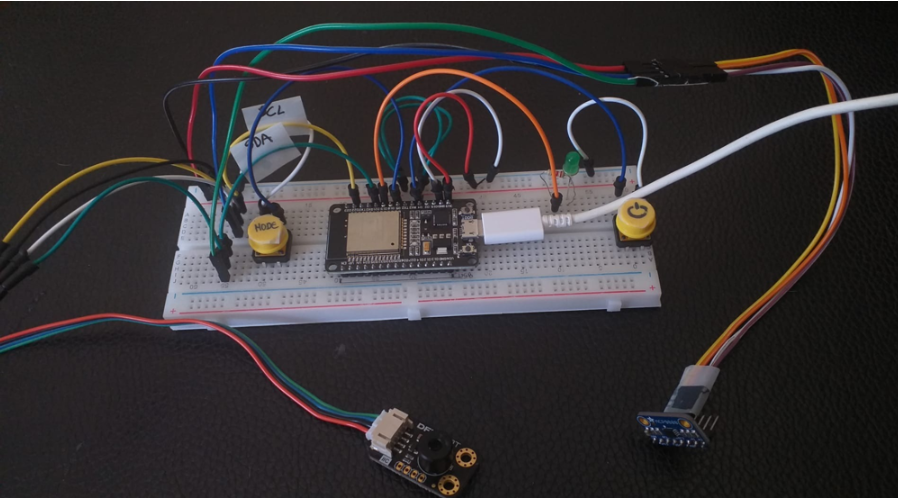

*Image: Example of a more advanced setup, for continuous and punctual measurement of the human body temperature, usingo simultaneously IR (black) and IC (blue) temperature sensors.*

## <div style="color:#00a0e4"> 2. Objectives</div>
* Understand the natural phisiology of human body temperature and the need for filtration
* Understand the practical applications of Kalman and IIR filters
* Develop a simple, affordable and wireless thermometer

## <div style="color:#00a0e4"> 3. Materials </div>
* Joy-It Node MCU ESP32 (it is also possible to use other ESP32 boards, like for example the Sparkfun ESP32 Thing)
* Jumper wires
* Breadboard (optional)
* DFRobot's IR I2C Thermometer Sensor Melexis MLX90614 (it is also possible to use other variants of the Melexis MLX90614 IR Sensor)
* Computer with Arduino IDE installed

# II. Experimental

<div style="width:100%; background:#00a0e4;color:#282828;font-family:'arial black'; text-align: center; padding: 7px 0; border-radius: 5px 50px; margin-top:-15px" > </div>

### <div style="color:#00a0e4">  1. Requirements and Set-up </div>

Basic knowledge on how to use the Arduino IDE and on how to manage simple electronic operations is recommended. 

It is also recommended that you read the notebooks concerning [ESP32 Firebase Connection](../ESP32_Firebase_Connection/ESP32_Firebase_Connection.ipynb), [Kalman Filtering](../Kalman/Kalman.ipynb) and [IIR Filtering](../IIR/IIR.ipynb).

In order to connect the Joy-It NodeMCU ESP32 board to the Arduino IDE, follow the instructions in the board's [user manual.](https://joy-it.net/files/files/Produkte/SBC-NodeMCU-ESP32/SBC-NodeMCU-ESP32-Manual-20200320.pdf) As mentioned, you will need to download the indicated USB drivers, to connect the board via micro USB to your pc. This will power the board and connect it to the IDE.

For other ESP32 boards, look up their user manual in order to set them up properly.

Once you've connected the ESP32 board, install the Adafruit MLX90614 Library in the Arduino IDE. This is the library for the IR Sensor.

### <div style="color:#00a0e4">  2. Circuit </div>

In order to setup the circuit assembly for this project, connect the IR sensor to the ESP32 board as is shown in the figure.

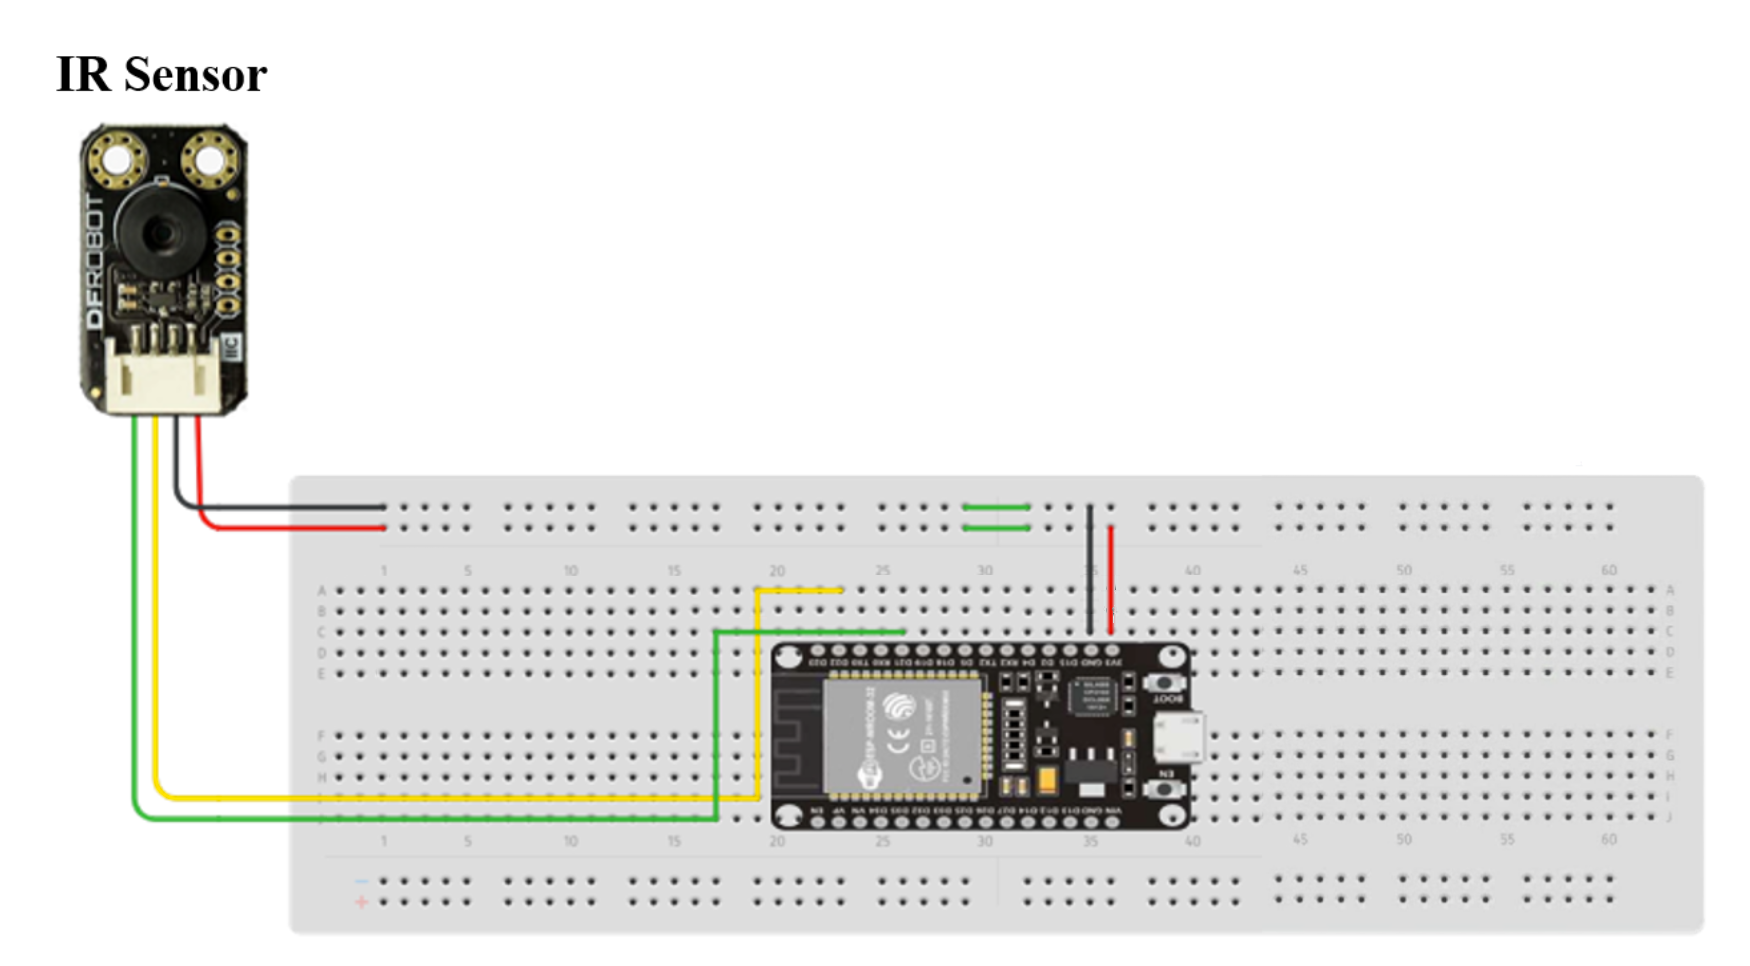

*Image: Circuit assembly with a breadboard, jumper wires, the Joy-It NodeMCU ESP32 board and the DFROBOT MLX90614 IR sensor.*

The ground (GND) pin should be connected to the GND on the board. The VCC pin on the sensor should be connected to the 3V3 entry on the board. Make sure that, if you arent using this specific variant of this IR sensor, that its supply voltage is 3.3V, which is the output voltage of this pin in the ESP32 board. 

Connect the SDA pin on the sensor board to the D21 pin and the SCL pin to the D22 pin on the board. These are the SDA and SCL pins on this specific ESP32 board, if you have a different board, chose the appropriate SDA and SCL pins. These are the pins that will be used by the sensor to transmit the temperature data to the board.

### <div style="color:#00a0e4">   3. Code </div>

Once you've assembled the circuit and connected the board to your computer with a micro USB cable, and finished setting up the board's connection with your pc, it's time to program the board to not only output the sensor value, but also process the data in real time in order to obtain continuous, second by second temperature data without noise or artifacts.

First, make sure to include the necessary libraries, the Adafruit MLX90614 library and the "Wire" library.

In the Arduino IDE, programs have two functions: ***setup( )*** and ***loop( )***. *Setup( )* runs once, while, *loop( )* runs much like a typical ***while*** or ***for*** loop, except it doesn't stop, and runs continuously while the board is turned on.

The *setup( )* function for this project is as follows:

As for the data processing, we will be using two filters, a [Kalman Filter](../Kalman/Kalman.ipynb) and an [Adaptive IIR filter](../IIR/IIR.ipynb). As mentioned, there are two separate notebooks regarding the theoretical principles behind these filters, their applications and how to implement them. 

We will be using Kalman filtration to remove high frequency noise caused by variations in the sensor measurement, in a similar way to how you would use a moving average to smooth out the signal. 

We will build three Kalman filters: one for an initial pass of the object temperature data, to smooth it and remove the variations, one for the second pass of the object temperature after the application of the adaptive IIR filter to smooth out the final result, and one for the ambient temperature, in order to remove noise and better use this signal to determine the strength of the IIR filter.

In order to implement this filter in the Arduino IDE, we will need to first initialize the necessary variables. 

***Q*** and ***R*** are the tuning parameters, which were adjusted to obtain the best and most appropriate filtration strength. The variables ***xhat*** and ***xhatminus***, will be the initial values for the current and previous state, *i.e.* the initial values for the object temperature. ***P*** and ***Pminus*** are the error covariance of the current and previous states, ***K*** is the Kalman gain and ***M*** is the current measured data. To learn more about how Kalman filtration works, it is recommended that you read the notebook on [Kalman Filtration](../Kalman/Kalman.ipynb).

These variables are placed inside a vector that the function ***kalman(double v[ ])*** will receive as an argument. The function will then compute the new values for each variable in this vector according to the equations of the algorithm:

Subsequently, we will attempt to remove punctual artifacts using adaptive filtration. As is detailed in the [separate notebook](../IIR/IIR.ipynb) concerning this type of filtration, it uses a correlated signal to selectively or adaptively filter a signal, varying the strength of the filter based on this correlated signal. 

The IR Sensor being used for this project has the particularity of outputting both the temperature of the object to which it is pointed (the object temperature, or body temperature), and the ambient temperature. 

Additionally, most artifacts observed in the data from the object temperature correspond to a drop in ambient temperature. That is, when there is a drop in ambient temperature, like a gust of wind hitting the sensor, a sharp rise in the object temperature can be noted, as can be observed in the following figure:

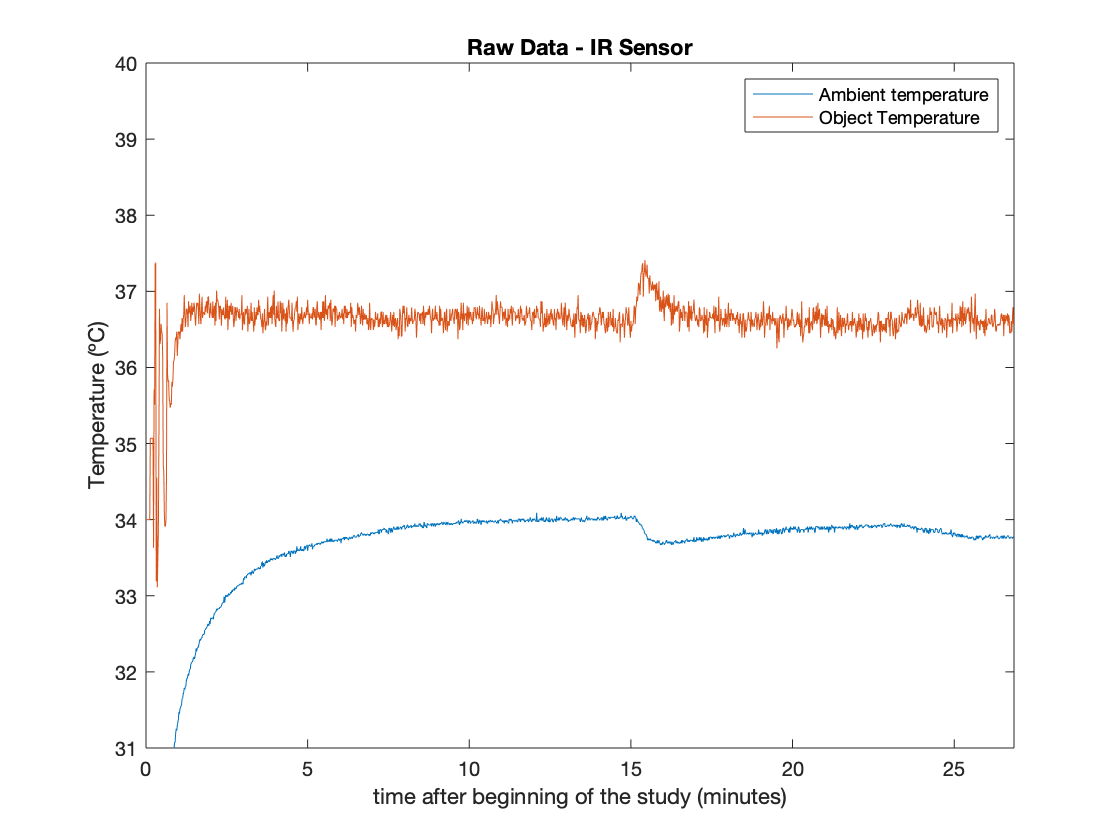

*Image: Raw (unfiltered) data obtained from the IR sensor during a test period of around 25 minutes. We can note the artefact caused by blowing air into the ear where the sensor is placed, causing the ambient temperature to decrease and the object temperature measurement to increase. A substantial amount of high frequency noise can also be observed, justifying the use of Kalman filtration to smooth the data.*

In order to correct these artifacts, we can apply an adaptive IIR filter to the object temperature data that is activated when the derivative of the ambient temperature reaches a certain threshold. 

As mentioned in the notebook regarding [adaptive IIR filters](../IIR/IIR.ipynb), the output of this filter depends on a variable alpha, which varies according to a parameter related to the correlated signal. In this case, the value of alpha will depend on the derivative of the ambient temperature. 

First, we must initialize the variables for the IIR filter, and like we did with the Kalman filter, we store them in a vector:

***y*** is the object temperature measurement, ***alpha*** is the variable alpha, ***a*** is a tuning parameter, and ***tamb*** is the value for the ambient temperature measurement.

The function for this filter receives the vectors containing the Kalman variables of the object and ambient temperatures. This is because the data will initially be filtered with a Kalman filter, and therefore the filtered data for the current measurement is contained within these vectors. 

Alpha is calculated using a sigmoid function, in order to vary it between 0 and 1, depending on the derivative of the ambient temperature (which is the difference between the previous and current values of the ambient temperature).

Finally, in the ***loop( )*** function, we apply a correction at the start by causing a small delay and averaging out the first values, in order obtain a signal that is stabilized right away, and then apply the filters (Kalman first, then adaptive IIR, then Kalman again to smooth out the signal). 

The full code is as follows:

#### <div style="color:#00a0e4">   3.1. Results  </div>

Here we can see the processing's response to various artifacts (gusts of wind, walking, going outside, etc.):

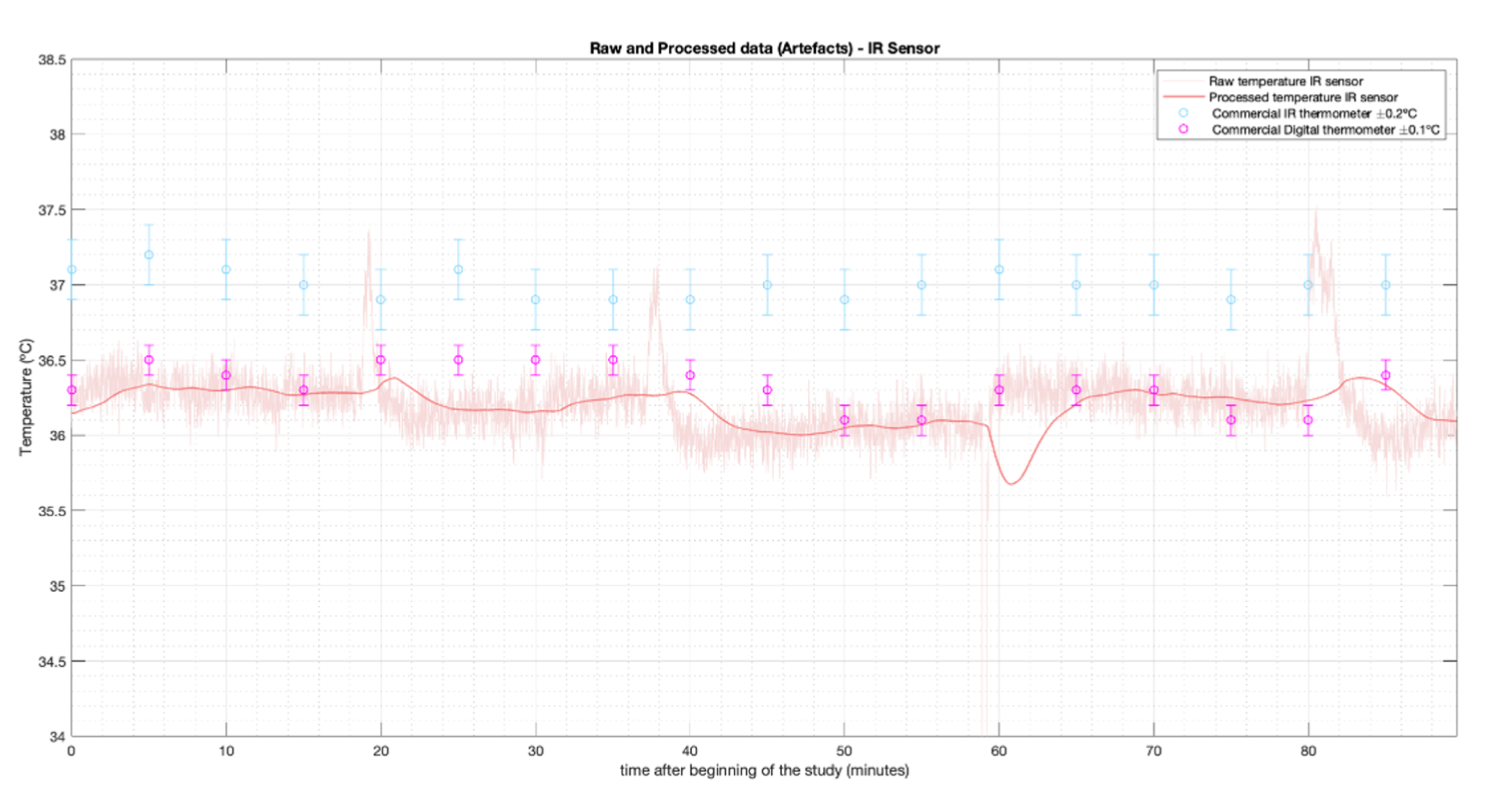

And here we can see the final processed data, measured during a period of 5 hours, and verified using two commercial thermometers.

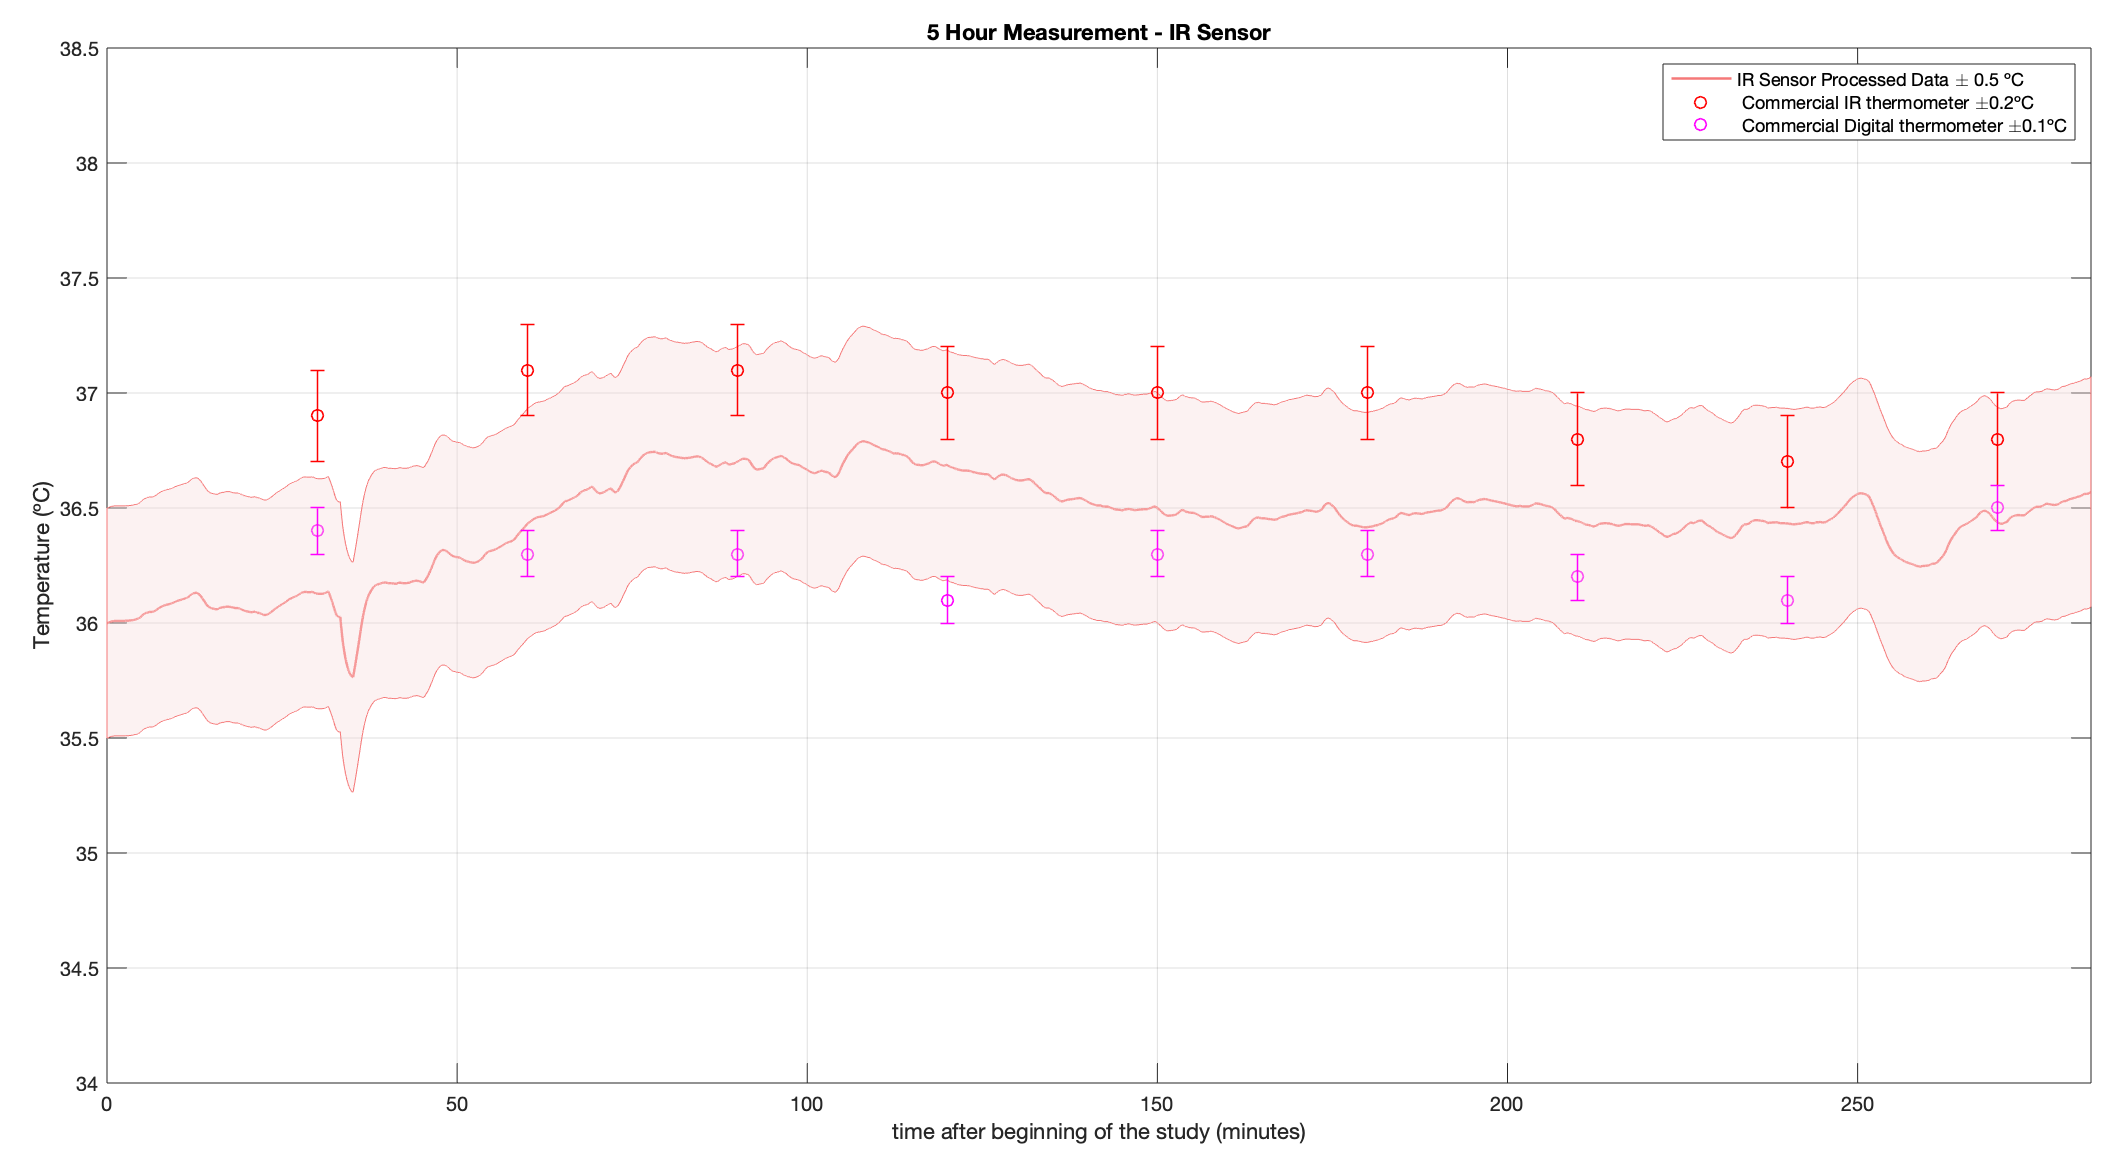

#### <div style="color:#00a0e4">   3.3. Notes and Warnings  </div>

<div style="background:#fada5e;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; ">  Warning! </span> <br>
  <div style="background:#fff3c4;font-size:12px"> 
    Make sure that the output of your board matches the supply voltage on your sensor!
</div>

<div style="background:#00bfc2;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; ">  Note </span> <br>
  <div style="background:#9eddde;font-size:12px"> 
    When measuring, make sure your sensor is placed inside the subjects ear, in order to obtain the most accurate measurement.
</div>

<div style="background:#00bfc2;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; ">  Note </span> <br>
  <div style="background:#9eddde;font-size:12px"> 
   Because of the way the initial stabilization works with the IIR filter, this device will work best if it is placed in the ear before being turned on to begin the measurement. It will take 20 seconds to stabilize before outputting any value!
</div>

<div style="background:#00bfc2;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; ">  Note </span> <br>
  <div style="background:#9eddde;font-size:12px"> 
   You can adjust the strength of the filters by changing the tuning parameters "Q" and "R" on the Kalman filters, and "a" on the IIR filter.
</div>

<div style="background:#00bfc2;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; ">  Note </span> <br>
  <div style="background:#9eddde;font-size:12px"> 
   To view and analyze the data, you can either use the Arduino IDE's serial monitor and serial plotter, or download the software "CoolTerm", which will store the outputted values in a text document.
</div>

<div style="background:#62d321;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; "> Explore </span> <br>
  <div style="background:#c5e8b0;font-size:12px"> 
    You can try to connect this device via bluetooth to your phone and use a powerbank as a battery to make it wireless, or connect it to Google Firebase to transmit the data to a mobile application!
</div>

<div style="background:#62d321;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; "> Explore </span> <br>
  <div style="background:#c5e8b0;font-size:12px"> 
    You can also try to construct a similar device using an IC contact temperature sensor, and use the axilla as a measurement location. The MCP9808 is a great choice! Hint: you only need a Kalman filter for this one!
</div>

# III. Conclusion
<div class='h1'  style="width:100%; background:#00a0e4;color:#282828;font-family:'arial black'; text-align: center; padding: 7px 0; border-radius: 5px 50px;margin-top:-15px" > </div>

We hope you have learned something useful, and perhaps even created your own device! Please send us any feedback or questions per e-mail, and we'll be glad to help!:

vicentegarcao98@gmail.com
ritamtbsilva@gmail.com

Special thanks to our professors João Sanches and Hugo 

<div style="height:115px; background:white;border-radius:10px;text-align:center"> 

<img src="https://www.lx.it.pt/~asmc/predict/images/IT.png" alt="it" style="position: relative; margin-left: 10px; bottom:-55px;max-width:150px;height:auto;"/> 
<img src="https://cqe.tecnico.ulisboa.pt/files/files/logos/IST_A_RGB_POS.png"
         alt="alternate text" 
         style="position: relative; margin-left: 10px;  bottom:-50px; width:150px;height:auto;"/>
</div> 

<div style="width: 100%; ">
    <div style="background:#00a0e4;color:white;font-family:'arial', monospace; text-align: center; padding: 50px 0; border-radius:10px; height:10px; width:100%; float:left " >
  <span style="font-size:20px;position:relative; top:-25px">  Suggestions are welcome! </span> <br>
 <span style="font-size:12px;position:relative; top:-25px">  Please provide us your feedback at jehdwne@it.lx.pt</span> 
</div>